In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
img1 = cv2.imread("/content/book2.jpg")
img2 = cv2.imread("/content/book1.jpg")
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
orb = cv2.ORB_create(400)
kp1, des1 = orb.detectAndCompute(img1_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
m1_2 = matcher.match(des1, des2)
m1_2 = sorted(m1_2, key=lambda x: x.distance)
ln = len(m1_2)
p1 = np.zeros((ln, 2))
p2 = np.zeros((ln, 2))
for i in range(ln):
    p1[i, :] = kp1[m1_2[i].queryIdx].pt
    p2[i, :] = kp2[m1_2[i].trainIdx].pt

H, mask = cv2.findHomography(p1, p2, cv2.RANSAC)

In [ ]:
rows,cols=img1.shape[:2]
img1_reg = cv2.warpPerspective(img1,H,(cols,rows))


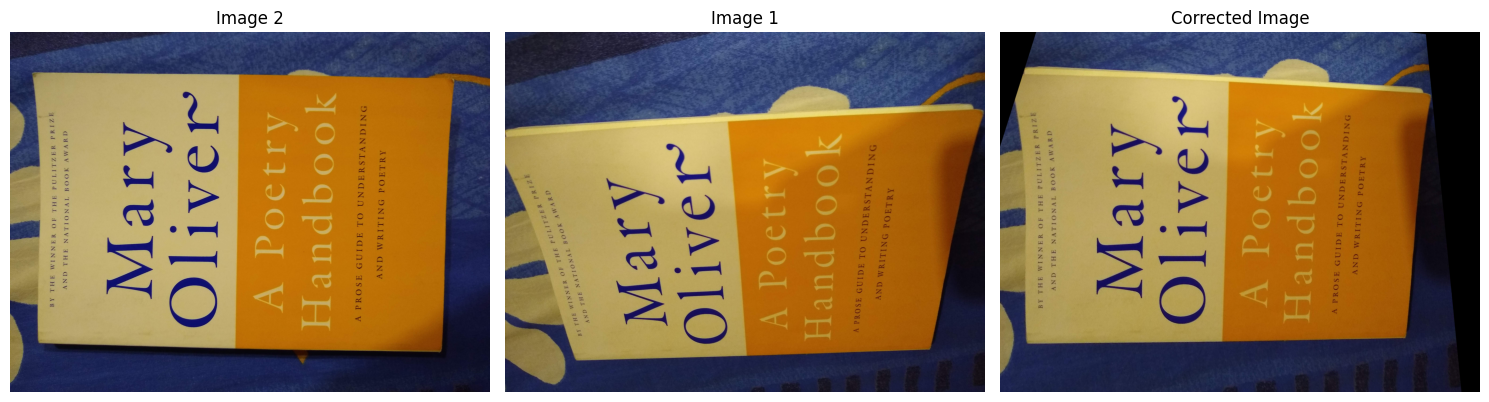

In [ ]:
h, w, c = img2.shape
img_corrected = cv2.warpPerspective(img1, H, (w, h))
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image 2')
axes[0].axis('off')
axes[1].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
axes[1].set_title('Image 1')
axes[1].axis('off')
axes[2].imshow(cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB))
axes[2].set_title('Corrected Image')
axes[2].axis('off')
plt.tight_layout()
plt.show()